# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [2]:
pip install matplotlib seaborn pandas numpy

You should consider upgrading via the '/Users/birongliu/Desktop/ds-fall-2025-wed-B.L/Week-03-EDA-and-Dashboards/exercise/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [4]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


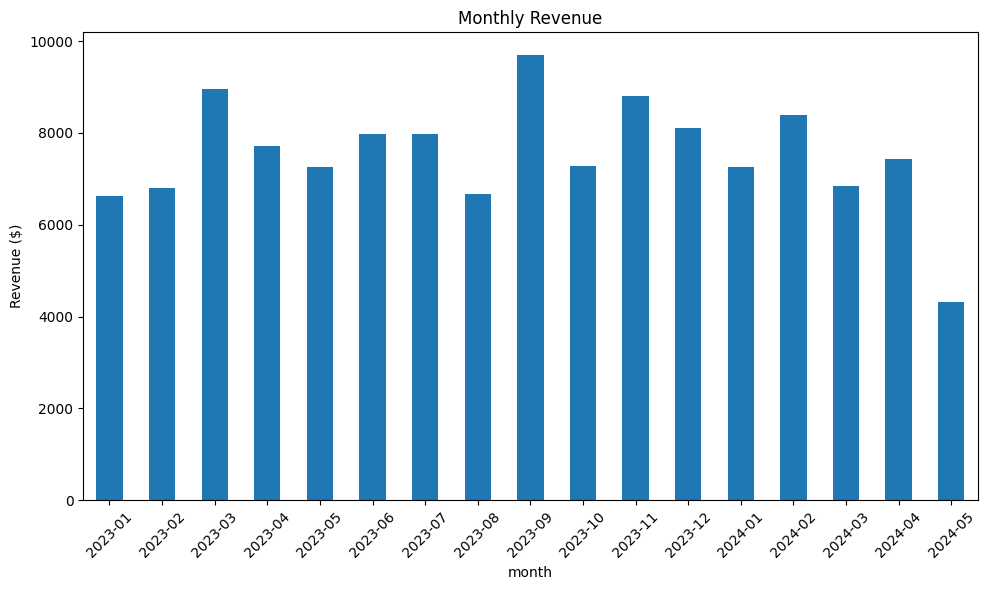

In [5]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [29]:
# Your code here
data["quarter"] = data["order_date"].dt.to_period("Q")
last_period = data["quarter"].max()
target_period = last_period - 1 
q_df = data[data["quarter"] == target_period]
q_df.groupby(q_df["order_date"].dt.to_period("M"))['revenue'].sum()

order_date
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
Freq: M, Name: revenue, dtype: float64

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [108]:
data.groupby(by="customer_id")['revenue'].sum().reset_index().sort_values("revenue").tail()


,customer_id,revenue
95,97,2835.62
90,92,2838.74
88,90,2976.78
22,24,3369.44
60,62,4448.39


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [53]:
# Your code here
customer_segment = data.groupby("customer_segment")['revenue'].mean()

print(customer_segment.head())
print(customer_segment.idxmax(), "spend the most")


customer_segment
Professional    255.652674
Senior          262.133925
Student         253.812087
Name: revenue, dtype: float64
Senior spend the most


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [48]:
# Your code here
data.groupby('region')['revenue'].sum()

region
East     31221.80
North    34351.69
South    34839.45
West     27727.73
Name: revenue, dtype: float64

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [77]:
# Your code her
pc = data.groupby("product_category")['quantity'].sum().sort_values(ascending=False)
pc_revenue = data.groupby("product_category")['revenue'].sum().sort_values(ascending=False)
print(pc)
print(pc_revenue)

product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [97]:
# Your code here
discount = data['discount_applied'] > 0

x = data[data['discount_applied'] == discount]['revenue'].mean()
print(x)
y = data[data['discount_applied'] != discount]['revenue'].mean()
print(y)
print("discount applied have more revenue" if x > y else "discount not applied have more revenue")

248.29633744855965
263.8313618677043
discount not applied have more revenue


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [46]:
# Your code here
total_count = data['payment_method'].value_counts(normalize=True)
print(total_count / total_count.sum() * 100)

total_spend_method = data.groupby('payment_method')['revenue'].mean()
print(total_spend_method)

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64
payment_method
Credit Card    257.444234
Debit Card     275.980650
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

<Axes: xlabel='day_of_week'>

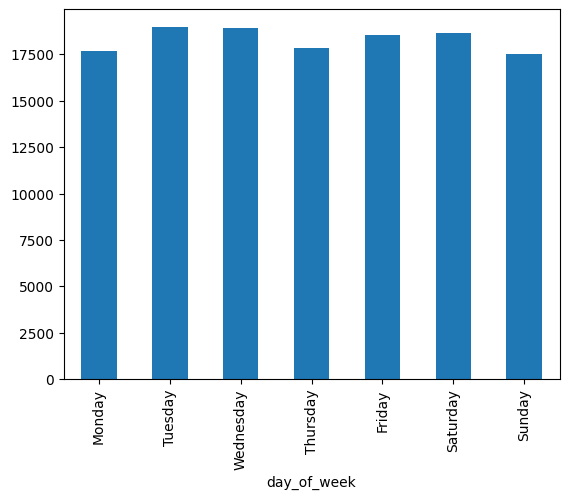

In [105]:
# Your code here
data["day_of_week"] = data['order_date'].dt.day_name()
day_revenue = data.groupby('day_of_week')['revenue'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_revenue.plot(kind='bar')


### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [113]:
# Your code here
data['profit'] = data['revenue'] * 20

total_profit = data['profit'].sum()
profit_by_region = data.groupby('region')['profit'].sum()
print(f"Total estimated profit (20% margin): ${total_profit:,.2f}")
print(profit_by_region)


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.
i believe that if there no discount and senior have more time on hand to shop in south for home products

through my analysis I found that senior often buy home applicance and there for we should promote specific home applicance and in the south region of the country. 

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.